# Fazi sistemi

In [1]:
from statistics import mean
from enum import Enum
from collections import namedtuple
from matplotlib import pyplot as plt

In [2]:
Point = namedtuple("Point", ["x", "y"])
a = Point(x = 0, y = 0)
print(a.x)
print(a.y)

0
0


## Implementacija fazi sistema

In [3]:
class FuzzyInput:
    def __init__(self, name, points, x_test):
        self.name = name
        self.points = points
        self.x_test = x_test
        self.mu = self.calcMu()

    def calcMu(self):
        if self.x_test < self.points[0].x:
            return self.points[0].y
        elif self.x_test >= self.points[-1].x:
            return self.points[-1].y
        else:
            for p1, p2 in zip(self.points[:-1], self.points[1:]):
                x1 = p1.x
                x2 = p2.x
                if self.x_test >= x1 and self.x_test <= x2:
                    if p1.y == p2.y:
                        return p1.y
                    elif p1.y < p2.y:
                        return (self.x_test - p1.x) / (p2.x - p1.x)
                    else:
                        return (p2.x - self.x_test) / (p2.x - p1.x)

In [4]:
class FuzzyOutput:
    def __init__(self, name, points):
        self.name = name
        self.points = points
        self.c = self.calcC()
        self.mu = 0

    def calcC(self):
        return mean([p.x for p in self.points if p.y == 1])

In [5]:
class LogicOp(Enum):
    AND = 0
    OR = 1

In [6]:
class FuzzyRule:
    def __init__(self, input1, input2, output, logicOp):

        if logicOp == LogicOp.AND:
            output.mu = max(output.mu, min(input1.mu, input2.mu))
        else:
            output.mu = max(output.mu, max(input1.mu, input2.mu))

## Upotreba fazi sistema za donošenje odluka

### Ulazi

#### Potrošnja automobila

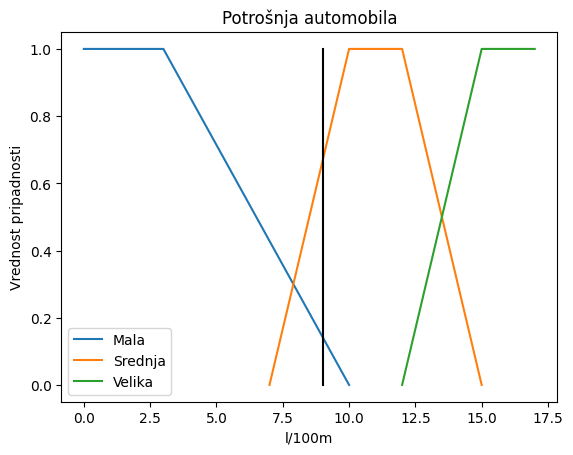

In [7]:

plt.plot([0, 3, 10], [1, 1, 0])
plt.plot([7, 10, 12,15],[0,1,1,0])
plt.plot([12,15,17],[0,1,1])

plt.title('Potrošnja automobila')
plt.legend(['Mala', 'Srednja', 'Velika'])
plt.xlabel("l/100m")
plt.ylabel("Vrednost pripadnosti")

plt.plot([9,9],[0,1], color='black')


$\mu_{mala}(9) = (10 - 9) / (10 - 3) = 0.14$

$\mu_{srednja}(9) = (9 - 7) / (10 - 7) = 0.67$

$\mu_{velika}(9) = 0$

In [8]:

potrosnja = []
potrosnja.append(FuzzyInput('mala', [Point(3,1), Point(10,0)], 9))
potrosnja.append(FuzzyInput('mala', [Point(7,0), Point(10,1), Point(12,1), Point(15,0)], 9))
potrosnja.append(FuzzyInput('mala', [Point(12,0), Point(15,1)], 9))

#### Pouzdanost

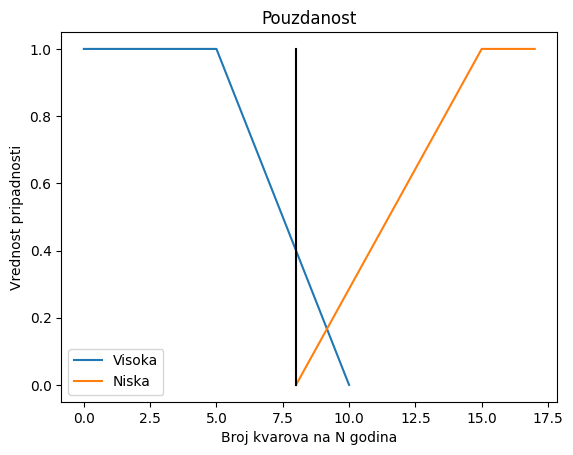

In [9]:

plt.plot([0,5,10],[1,1,0])
plt.plot([8,15,17],[0,1,1])

plt.title('Pouzdanost')
plt.legend(['Visoka', 'Niska'])
plt.xlabel("Broj kvarova na N godina")
plt.ylabel("Vrednost pripadnosti")

plt.plot([8,8],[0,1], color='black')


$\mu_{visoka}(8) = (10 - 8) / (10 - 5) = 0.4$

$\mu_{niska}(8)$ = 0

In [10]:

pouzdanost = []
pouzdanost.append(FuzzyInput('visoka', [Point(5,1), Point(10,0)], 8))
pouzdanost.append(FuzzyInput('niska', [Point(8,0), Point(15,1)], 8))

### Izlazi

#### Vrednost automobila

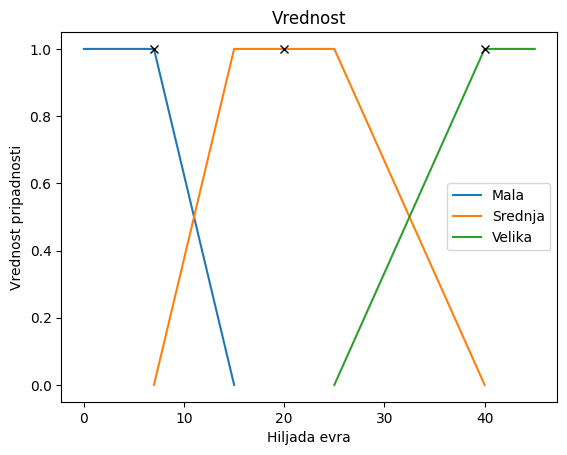

In [11]:

plt.plot([0, 7, 15], [1, 1, 0])
plt.plot([7,15,25,40], [0,1,1,0])
plt.plot([25,40,45], [0,1,1])
plt.title('Vrednost')
plt.legend(['Mala', 'Srednja', 'Velika'])
plt.xlabel("Hiljada evra")
plt.ylabel("Vrednost pripadnosti")
plt.plot([7],[1],'x',color='black')
plt.plot([40],[1],'x',color='black')
plt.plot([(15 + 25) / 2], [1], 'x',color='black')

In [12]:

vrednost = []
vrednost.append(FuzzyOutput('mala', [Point(7,1), Point(15,0)]))
vrednost.append(FuzzyOutput('mala', [Point(7,0), Point(15,1), Point(25, 1), Point(40,0)]))
vrednost.append(FuzzyOutput('mala', [Point(25,0), Point(40,1)]))

### Pravila


1. $\mu_{malaPotrosnja} \wedge \mu_{visokaPouzdanost} \implies \mu_{velikaVrednost}$
2. $\mu_{malaPotrosnja} \wedge \mu_{niskaPouzdanost} \implies \mu_{srednjaVrednost}$
3. $\mu_{srednjaPotrosnja} \wedge \mu_{visokaPouzdanost} \implies \mu_{srednjaVrednost}$
4. $\mu_{srednjaPotrosnja} \wedge \mu_{niskaPouzdanost} \implies\mu_{srednjaVrednost}$
5. $\mu_{velikaPotrosnja} \wedge \mu_{visokaPouzdanost} \implies \mu_{srednjaVrednost}$
6. $\mu_{velikaPotrosnja} \wedge \mu_{niskaPouzdanost} \implies \mu_{malaVrednost}$


1. $\mu_{velikaVrednost} = min(\mu_{malaPotrosnja}, \mu_{visokaPouzdanost})$
2. $\mu_{srednjaVrednost} = min(\mu_{malaPotrosnja}, \mu_{niskaPouzdanost})$
3. $\mu_{srednjaVrednost} = min(\mu_{srednjaPotrosnja}, \mu_{visokaPouzdanost})$
4. $\mu_{srednjaVrednost} = min(\mu_{srednjaPotrosnja}, \mu_{niskaPouzdanost})$
5. $\mu_{velikaVrednost} = min(\mu_{velikaPotrosnja}, \mu_{visokaPouzdanost})$
6. $\mu_{malaVrednost} = min(\mu_{velikaPotrosnja}, \mu_{niskaPouzdanost})$


$\mu_{velikaVrednost} = min(0.14, 0.4) = 0.14$

$\mu_{srednjaVrednost} = max(0, 0.4, 0, 0) = 0.4 $

$\mu_{malaVrednost} = min(0, 0) = 0$


In [13]:
rules = []
rules.append(FuzzyRule(potrosnja[0], pouzdanost[0], vrednost[2], LogicOp.AND))
rules.append(FuzzyRule(potrosnja[0], pouzdanost[1], vrednost[1], LogicOp.AND))
rules.append(FuzzyRule(potrosnja[1], pouzdanost[0], vrednost[1], LogicOp.AND))
rules.append(FuzzyRule(potrosnja[1], pouzdanost[1], vrednost[1], LogicOp.AND))
rules.append(FuzzyRule(potrosnja[2], pouzdanost[0], vrednost[1], LogicOp.AND))
rules.append(FuzzyRule(potrosnja[2], pouzdanost[1], vrednost[0], LogicOp.AND))

### Rezultat


$\frac{\mu(mala) * c(mala) + \mu(srednja) * c(srednja) + \mu(velika) * c(velika)}{\mu(mala) + \mu(srednja) + \mu(velika)} = \frac{0 * 7 + 0.4 * 20 + 0.14 * 40}{0 + 0.4 + 0.14} = 25.26$

In [14]:
res1 = 0
res2 = 0

for v in vrednost:
    res1 += v.mu * v.c
    res2 += v.mu

res = res1/res2
res

25.26315789473684